Upside down detector: Train a model to detect if images are upside down

---



Librairies that we'll need for our model.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #give a label to them automatically
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

I chose the cifar10 as a dataset

In [ ]:
(X_train, labels_train),  (X_test, labels_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
# I choose to work on one category of cifar10's data.
index = np.where(labels_train == 0)
X_train = X_train[index[0]]
index = np.where(labels_test == 0)
X_test = X_test[index[0]]

In [ ]:
X_train.shape

(5000, 32, 32, 3)

In [ ]:
from sklearn.model_selection import train_test_split
#when creating the vector labels, I have to give the % of 1s or 0s, so it's better to introduce a variable, so as not to change everything every time
n = 0.4
n1 = 0.3
X_trainUp, X_trainDown = train_test_split(X_train, test_size= n,shuffle=False) # n % upside images.
X_testUp, X_testDown = train_test_split(X_test, test_size= n1,shuffle=False) # n1 % upside images.

In [ ]:
len(X_trainDown)

2000

In [ ]:
!pip install tensorflow_addons #This library has an efficient method to rotate my images 

In [ ]:
import tensorflow_addons as tfa
import math
X_trainDown = tfa.image.transform_ops.rotate(X_trainDown, math.pi)
X_testDown = tfa.image.transform_ops.rotate(X_testDown, math.pi)

In [ ]:
len(X_testDown)

300

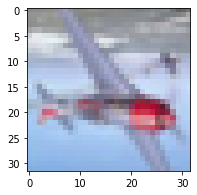

In [ ]:
plt.figure(figsize = (30,3))
plt.imshow(X_testDown[5])

In [ ]:
X_train = np.concatenate((X_trainUp,X_trainDown)) # concatenate upside down images with the normal ones.
X_test = np.concatenate((X_testUp,X_testDown)) # concatenate upside down images with the normal ones.

In [ ]:
L1 = [0 for i in range(int(5000*n))]
L2 = [1 for i in range( int( 5000*(1-n)))] # we will sort the labels in the ordre of data for Up (ones) for down (zeros)
L = np.concatenate((L2,L1)) #labeling my data training, ones for upside down images, zeros for normal pictures.

Ltest1 = [0 for i in range(int(1000 * n1))]
Ltest2 = [1 for i in range(int(1000 * (1-n1)))]
labelsTest = np.concatenate((Ltest2,Ltest1)) #labeling my data test, ones for upside down images, zeros for normal pictures.

In [ ]:
import random
from random import shuffle
import copy 
ll = [i for i in range(5000)]
shuffle(ll,random.random) #mixing my data

labels = L[ll]
X_train_shuff = copy.deepcopy(X_train)[ll]

Listest = [i for i in range(1000)]
shuffle(Listest,random.random) #mixing my data

labelsTest = labelsTest[Listest]
X_test_shuff = copy.deepcopy(X_test)[Listest]

1


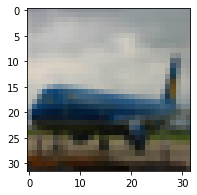

In [ ]:
plt.figure(figsize = (30,3))
plt.imshow(X_train_shuff[1])
print(labels[1])

1


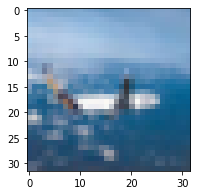

In [ ]:
plt.figure(figsize = (30,3))
plt.imshow(X_train_shuff[ll[3]])
print(labels[3])

In [ ]:
# Normolizing pixel to floating values between 0 and 1
X_train_shuff = X_train_shuff/255.0
X_test_shuff = X_test_shuff/255.0

In [ ]:
# Defining our model
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(120, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 120)         69240     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 120)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 480)              

In [ ]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss= sparse_categorical_crossentropy,
              optimizer= tf.keras.optimizers.RMSprop(lr=2e-5), #Adam(),
             metrics=['acc'])

history = model.fit(X_train_shuff, labels, epochs=30, 
                    validation_data=(X_test_shuff, labelsTest))

Epoch 1/30
157/157 [==============================] - 2s 6ms/step - loss: 0.6681 - acc: 0.6069 - val_loss: 0.6178 - val_acc: 0.7000
Epoch 2/30
157/157 [==============================] - 1s 5ms/step - loss: 0.6564 - acc: 0.5878 - val_loss: 0.5642 - val_acc: 0.7000
Epoch 3/30
157/157 [==============================] - 1s 5ms/step - loss: 0.6136 - acc: 0.5938 - val_loss: 0.5447 - val_acc: 0.7090
Epoch 4/30
157/157 [==============================] - 1s 5ms/step - loss: 0.5758 - acc: 0.6209 - val_loss: 0.5426 - val_acc: 0.7590
Epoch 5/30
157/157 [==============================] - 1s 5ms/step - loss: 0.5751 - acc: 0.6539 - val_loss: 0.5983 - val_acc: 0.7490
Epoch 6/30
157/157 [==============================] - 1s 5ms/step - loss: 0.5701 - acc: 0.6715 - val_loss: 0.5713 - val_acc: 0.7700
Epoch 7/30
157/157 [==============================] - 1s 5ms/step - loss: 0.5613 - acc: 0.6918 - val_loss: 0.5555 - val_acc: 0.7710
Epoch 8/30
157/157 [==============================] - 1s 5ms/step - loss: 0.

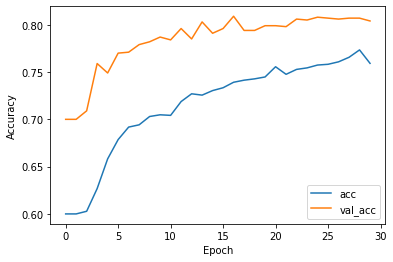

In [ ]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
# Model evaluation
scores = model.evaluate(X_test_shuff, labelsTest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.40%


One idea that I have to improve my code is to add a third category that contain symmetric images.
First, I tried to do the assignment with a small data, using some personal images, I had to use method to recover the images from the folders. So it was a little bit different from this. I got 96% in the accuracy.

With this model the validation accuracy reaches 80.40% while training accuracy almost reaches 91%. 

You find in this link a screenshot of this result https://drive.google.com/file/d/1eJVI77pW6LmLrTR69qUyQ2gVenKgOYwi/view?usp=sharing

